In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss

import os

os.chdir('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/')

In [21]:
hr = pd.read_csv('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets/HR_comma_sep.csv')
x,y = hr.drop('left',axis=1),hr['left']





from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE', ohe, make_column_selector(dtype_include=object))],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
x = col_trnf.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25,stratify=y)


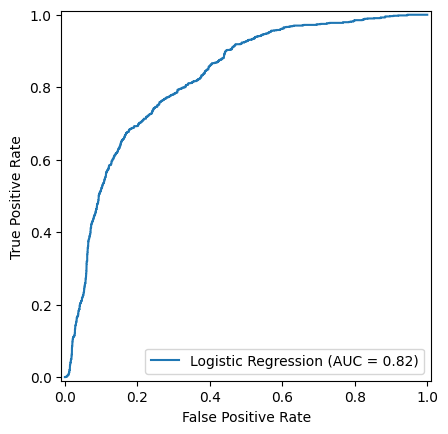

In [22]:
lr = LogisticRegression(solver="liblinear",penalty='l1')
lr.fit(x_train,y_train)
y_pred_proba = lr.predict_proba(x_test)
fpr,tpr,thres = roc_curve(y_test,y_pred_proba[:,1])
disp = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test,y_pred_proba[:,1]),name = 'Logistic Regression')
disp.plot()
plt.show()


In [23]:
import warnings

warnings.filterwarnings('ignore')

solvers = ['lbfgs',  'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]
# Cs = np.linspace(0.001, 15, 20)

scores =[]

for s in solvers:
    for p in penalties:
        
        ls = LogisticRegression(solver=s, penalty=p)
        ls.fit(x_train, y_train)
        y_pred_proba = ls.predict_proba(x_test)
        scores.append([s, p, roc_auc_score(y_test,y_pred_proba[:,1])])
            

df_acc_scores = pd.DataFrame(scores, columns=['solver', 'penalty', 'roc_score'])
df_acc_scores.sort_values('roc_score', ascending=False)

,solver,penalty,roc_score
4,newton-cholesky,l2,0.822268
3,newton-cg,None,0.822192
5,newton-cholesky,None,0.822144
2,newton-cg,l2,0.822101
1,lbfgs,None,0.817434
0,lbfgs,l2,0.816183
7,sag,None,0.810117
6,sag,l2,0.810071
9,saga,None,0.775310
8,saga,l2,0.775202


In [25]:
lr = LogisticRegression(solver="liblinear",penalty='l1')
lr.fit(x_train,y_train)
y_pred_proba = lr.predict_proba(x_test)
log_loss(y_test,y_pred_proba)

0.4276045058615779

In [ ]:

solvers = ['lbfgs',  'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]
# Cs = np.linspace(0.001, 15, 20)

scores =[]

for s in solvers:
    for p in penalties:
        
        ls = LogisticRegression(max_iter=5000,solver=s, penalty=p)
        ls.fit(x_train, y_train)
        y_pred = ls.predict(x_test)
        scores.append([s, p, log_loss(y_test,y_pred)])
            

df_acc_scores = pd.DataFrame(scores, columns=['solver', 'penalty', 'score'])
df_acc_scores.sort_values('score', ascending=True)

,solver,penalty,score
8,saga,l2,0.797288
3,newton-cg,None,0.799066
5,newton-cholesky,None,0.799066
4,newton-cholesky,l2,0.799066
9,saga,None,0.799066
1,lbfgs,None,0.799289
2,newton-cg,l2,0.799289
0,lbfgs,l2,0.799511
6,sag,l2,0.801067
7,sag,None,0.802178
